<a href="https://colab.research.google.com/github/jiahuili1995/ELEC4630-computer-vision/blob/main/Qq12roc199.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install dlib

install dlib.

In [24]:
# create 2 folder for target face and zero-effect imposters
#manunally upload image for local computer
!mkdir -p images
!mkdir -p images_over_21

creat a image folder, input testing and validation images.

In [3]:
!pip3 install face_recognition

     |████████████████████████████████| 100.2MB 33kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566173 sha256=506bba61ff37fcd051922587910a9295c3febcdf0dcc17265d3653ee3964af14
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [139]:
import face_recognition
from PIL import Image, ImageDraw
import numpy as np
import os
from sklearn import metrics


# This is an example of running face recognition on a single image
# and drawing ROC curve

# Load a sample picture and learn how to recognize it.
passport_image = face_recognition.load_image_file("images_over_21/image_0001.jpg")
passport_face_encoding = face_recognition.face_encodings(passport_image)[0]

# Create arrays of known face encodings and their names
known_face_encoding = [
     passport_face_encoding,
]
known_face_names = [
     "first person",
]
y = []
target_likelihood = []

path="images_over_21/"
path_list=os.listdir(path)
path_list.sort() #sorting files 
for a in range(0,20):
  y.append(1)
for a in range(20,194):
  y.append(0)

for filename in range(len(path_list)):	  
    unknown_image = face_recognition.load_image_file(path+path_list[filename])
    face_encodings = face_recognition.face_encodings(unknown_image)[0]

    #for track the process
    print(filename)
# the cosine simility is closest method to perfroming the likelihood of two different vectors  
    cosine_simility = np.dot(known_face_encoding, face_encodings)/(np.linalg.norm(known_face_encoding)*(np.linalg.norm( face_encodings)))
    print(cosine_simility)
    target_likelihood.append(cosine_simility[0])


0
[1.]
1
[0.99366766]
2
[0.97550086]
3
[0.98881835]
4
[0.9939707]
5
[0.99527893]
6
[0.99203286]
7
[0.99022097]
8
[0.99417169]
9
[0.97991605]
10
[0.9932111]
11
[0.98181847]
12
[0.9927566]
13
[0.98351053]
14
[0.97785915]
15
[0.96244147]
16
[0.99390431]
17
[0.98772136]
18
[0.9951749]
19
[0.99109403]
20
[0.95675474]
21
[0.86799998]
22
[0.86371096]
23
[0.88842032]
24
[0.86779656]
25
[0.86922636]
26
[0.8619168]
27
[0.86575525]
28
[0.86413651]
29
[0.8617386]
30
[0.87485356]
31
[0.86230671]
32
[0.86582648]
33
[0.87594993]
34
[0.87388872]
35
[0.8646481]
36
[0.86823681]
37
[0.88000737]
38
[0.88162632]
39
[0.86545799]
40
[0.8643341]
41
[0.8586604]
42
[0.87487037]
43
[0.86306919]
44
[0.86696554]
45
[0.85786206]
46
[0.85222355]
47
[0.85784529]
48
[0.85499605]
49
[0.8545081]
50
[0.84952418]
51
[0.85331244]
52
[0.85442479]
53
[0.85616884]
54
[0.86235336]
55
[0.87102342]
56
[0.85605705]
57
[0.85302989]
58
[0.86133294]
59
[0.84759371]
60
[0.84740031]
61
[0.85652369]
62
[0.85742028]
63
[0.85391621]
64
[

IndexError: ignored

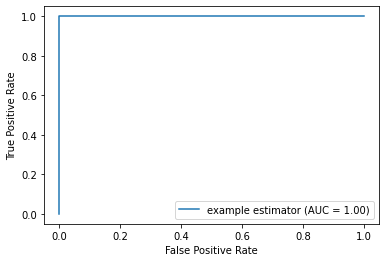

fpr
[0. 0. 0. 1.]
tpr
[0.   0.05 1.   1.  ]
thresholds


array([2.        , 1.        , 0.96244147, 0.78540175])

In [135]:
import matplotlib.pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y, target_likelihood)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()
print('fpr')
print(fpr)
print('tpr')
print(tpr)
print('thresholds')
thresholds

install face recognition model.